<a href="https://colab.research.google.com/github/magesh73/project1/blob/master/Assignment_4/Assignment4_Third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:**  To Train DNN of MNIST data to detect digits in image by hiting validation accuracy of 99.4 and  parmeters less then 20000. 

**Architecture** : 

Convoultion with Relu(10,3,3)--->**BN-**->Convoultion with Relu(10,3,3)-->**BN-**->Convoultion with Relu(20,3,3)-->**BN**

                                                  |
                                                  |
                                                 MAXPool(2,2)
                                                  |
                                                  |
                                                  |
Convoultion with Relu(10,1,1)--->**BN-**->Convoultion with Relu(10,3,3)-->**BN-**->Convoultion with Relu(20,1,1)-->**BN-**->Convoultion(10,1,1)-->**BN**->Convoultion(10,7,7)

                                                 |
                                                 |
                                                 Flatten
                                                 |
                                                 |
                                                 Softmax
                                                 
**  Learning rate **0.003 is added with drop of 0.332 in 10th iteration , No DROPOUT used


**OUTCOME**: 11 K parameters at Validation aaccuracy of 99.42 os reached with out using dropouts

                                                 
                                                 

**INFERENCE**: CLR reduces the number of  iteration and hits accuracy quicker, DROPOUTS is not used in this architecture, in next experiment like to use DROPOUT and like to watch the result


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


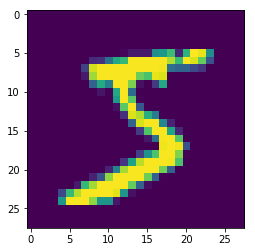

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22


model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11

model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_la

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 20)        1820      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 11, 11, 20)        80        
__________

In [0]:
#def incrementalLr(initial_lr=0.003,epochs=500,stop_lr=0.004):
 #   from keras.optimizers import Adam
     
  #  clr= initial_lr
    
   # while(clr < stop_lr):
    
    #  model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=clr), metrics=['accuracy'])
     # history=model.fit(X_train, Y_train, batch_size=128, epochs=epochs, validation_data=(X_test, Y_test),verbose=1)
              
      #score = model.evaluate(X_test, Y_test, verbose=0)
      #print("lr-->",clr,"epochs-->",epochs)
      #print("val__acc-->",score[1])
      #clr= clr+0.001
      #epochs= epochs+10
    #return

In [0]:
#incrementalLr()

In [0]:
 #plot_lr()

In [0]:
    # learning rate schedule
    def step_decay(epoch):
        
        import math
        initial_lrate = 0.003
        drop = 0.332
        epochs_drop = 10
        lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
        return lrate


       

In [0]:
# plot learning curves
from matplotlib import pyplot as plt


def plot_lr():

        '''Helper function to quickly inspect the learning rate schedule.'''

        plt.plot(history['iterations'], history['lr'])

        plt.yscale('log')

        plt.xlabel('Iteration')

        plt.ylabel('Learning rate')

        plt.show()

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
history =model.fit(X_train, Y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(step_decay, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 8s 140us/step - loss: 0.1504 - acc: 0.9524 - val_loss: 0.0994 - val_acc: 0.9678
Epoch 2/200

Epoch 00002: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 6s 93us/step - loss: 0.0497 - acc: 0.9845 - val_loss: 0.0435 - val_acc: 0.9868
Epoch 3/200

Epoch 00003: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 6s 93us/step - loss: 0.0388 - acc: 0.9880 - val_loss: 0.0781 - val_acc: 0.9759
Epoch 4/200

Epoch 00004: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 6s 96us/step - loss: 0.0320 - acc: 0.9901 - val_loss: 0.0260 - val_acc: 0.9918
Epoch 5/200

Epoch 00005: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] 

KeyboardInterrupt: ignored

In [0]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
#model.fit(X_train, Y_train, batch_size=66, nb_epoch=365, validation_data=(X_test, Y_test))
#model.save_weights('Assignment4_Second.h5')

In [0]:
#count=0
#testscore=0
#while ( testscore< 0.994 ) :
#model.fit(X_train, Y_train, batch_size=60, nb_epoch=10000, verbose = 1)
#score = model.evaluate(X_test, Y_test, verbose=0)
#testscore=score[1]
#model.save_weights('Assignment4_Second.h5')
#count= count +10000
#print(score)
#print(count)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
model.save_weights('Assignment4_Second.h5')

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()